# Pandas and Advanced plotting
- introduce pandas
- filehandling with pandas
- pandas with pyplot
- pandas with seaborn

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Pandas DataFrames

you can create them from a dict

In [5]:
data = {
    "A": [1, 2, 3],
    "B": np.random.rand(3),
    "C": ["a", "b", "c"]
}
data

{'A': [1, 2, 3],
 'B': array([0.39647309, 0.45514509, 0.92578612]),
 'C': ['a', 'b', 'c']}

In [6]:
df = pandas.DataFrame(data)

In [7]:
df

,A,B,C
0,1,0.396473,a
1,2,0.455145,b
2,3,0.925786,c


## Columns are series. Kind of like np.arrays

In [10]:
df["D"] = df["A"] + df["B"]**2

In [11]:
df

,A,B,C,D
0,1,0.396473,a,1.157191
1,2,0.455145,b,2.207157
2,3,0.925786,c,3.857080


# Access 

In [9]:
# access columns A
df["A"]

0    1
1    2
2    3
Name: A, dtype: int64

In [12]:
df[["A", "B", "D"]]

,A,B,D
0,1,0.396473,1.157191
1,2,0.455145,2.207157
2,3,0.925786,3.857080


## Logical Indexing

In [14]:
L = df["A"] == 2
L

0    False
1     True
2    False
Name: A, dtype: bool

In [16]:
# extract rows
df[L]

,A,B,C,D
1,2,0.455145,b,2.207157


In [19]:
# extract elements in a column
df["A"][L] 

1    2
Name: A, dtype: int64

In [20]:
df["B"][L]

1    0.455145
Name: B, dtype: float64

# Loading from and to file

Very practical is the fact that you can open.csv files. I downloaded some random data from the ecdc regarding corona. its in a csv file format. I took it from here https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [21]:
df_corona = pandas.read_csv("data/ecdc_corona.csv")

In [22]:
df_corona

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
1,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
2,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
3,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
4,30/11/2020,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
...,...,...,...,...,...,...,...,...,...,...
9359,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11
9360,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9361,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9362,30/03/2020,2020-13,5,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05


## Use Case: Analyze Corona data 

In [33]:
# let's get all the data regarding austria
is_austria = df_corona["countriesAndTerritories"] == "Austria"

df_austria = df_corona[is_austria]

print(f"Rows concerning austria: {np.sum(is_austria)}")

Rows concerning austria: 52


In [63]:
# sort data by date.
#df_austria = df_austria.sort_values("dateRep") # --> does not work because data is in wired format
df_austria = df_austria.sort_index(ascending=False) # --> just flip it upside down

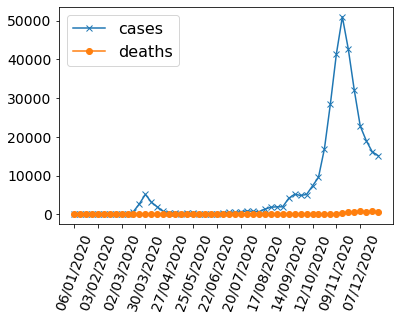

In [65]:
# this sets the size (and thus shape) of the figure
#plt.figure(figsize=(8, 4))

plt.plot(df_austria["dateRep"], df_austria["cases_weekly"], "x-", label="cases")
plt.plot(df_austria["dateRep"], df_austria["deaths_weekly"], "o-", label="deaths")

# use only every ourth date, rotate and increase fontsize
plt.xticks(df_austria["dateRep"].iloc[::4], rotation=70, fontsize=14);
plt.yticks(fontsize=14);

# use legend with suitable font size
plt.legend(fontsize=16)



### Exercise
Find any csv unrelated to this course and visualize some of the data contained in it using pandas and pyplot as we did above.

# Seaborn 